<a href="https://colab.research.google.com/github/mlccgkpol/makeMore/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
%matplotlib inline

In [52]:
words = open("names.txt",'r').read().splitlines()

In [53]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

torch.Size([27, 27])


In [57]:

z

In [58]:
# 27,27
# 27

#27,27
# 1,27 it will shift the 27 right.

# so we will have problem instead of normalizing rows, we are normalizing column.

# Thats why (keepdim = true) to get desired result when required.

In [59]:
for w in ["rohit"]:
  chs = ['.'] + list(w) + ['.']
  logProb = 0;
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logProb += -torch.log(prob)
logProb/=3
print(f'{ch1}{ch2} -> {prob:.4f} -> {logProb: .4f}')

t. -> 0.0705 ->  6.0212


In [60]:
# minimize negative log likelihood.

In [106]:
# create the training set of bigrams (x,y)
xs,ys = [],[]

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  # print(chs,"chs")
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

there are two ways to create tensor
torch.tensor &
torch.Tensor

In [107]:
x_enc = F.one_hot(xs,num_classes=27).float()

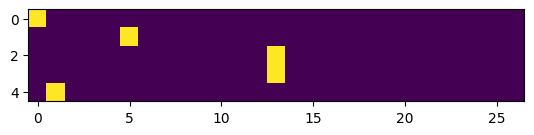

In [108]:
plt.imshow(x_enc)

In [109]:
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((27,27), generator = g, requires_grad=True)

In [110]:
# forward pass
logits = x_enc @ W
counts = logits.exp() # softmax
prob = counts/counts.sum(1,keepdims=True) # softmax
loss = -prob[torch.arange(5),ys].log().mean()

\begin{equation}
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
\end{equation}

In [ ]:
# temp1 = x_enc[3]
# temp2 = W[:,13]
# (temp1*temp2).sum()
# logits[3,13]

In [98]:
idx_max = torch.argmax(prob[4]).item() # to get the maximum likelihood(not MLE) of the next character.
itos[idx_max]

'n'

In [101]:
prob[0,5], prob[1,13], prob[2,13],prob[4,0]

(tensor(0.0229), tensor(0.0258), tensor(0.0339), tensor(0.0402))

In [111]:
#backward pass
W.grad = None # setting this to None is better than 0 as this is more efficient.
loss.backward()